In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('USA_Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.drop('Address',axis=1,inplace=True)

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


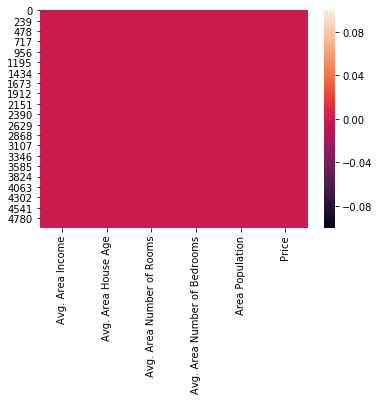

In [10]:
sns.heatmap(df.isnull())     ## map shows here no null cols

In [11]:
df.corr() ###matrix -1 to 1 relation  ## expected is independant cols should not be related to each other i.e relation should be 0
##evry independant cols should have perfect relation(1) with dependant col here price 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


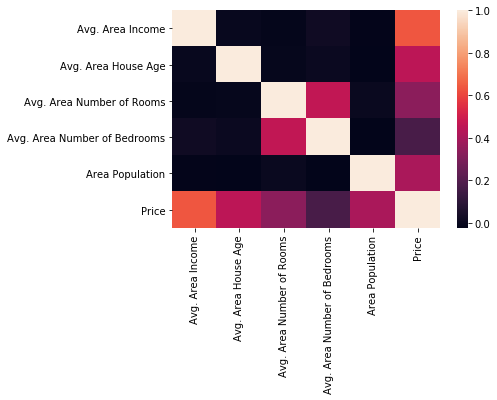

In [12]:
sns.heatmap(df.corr())

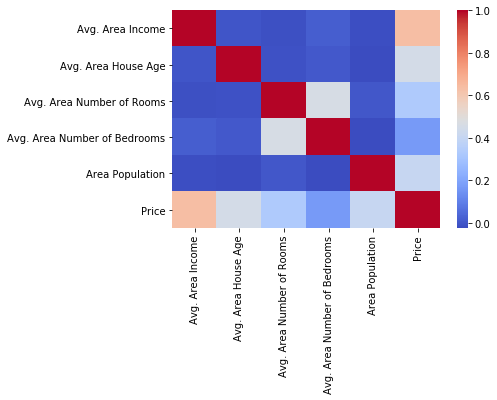

In [13]:
sns.heatmap(df.corr(),cmap='coolwarm') ####red indicates here perfectly match

In [14]:
# avg area no of bedrooms is not perfectly related to price # price here is independant col and other five are dependant

In [15]:
df.drop('Avg. Area Number of Bedrooms',axis=1,inplace=True)

In [17]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [18]:
###standard scaling to avoid biasing

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_Array=ss.fit_transform(df.drop('Price',axis=1))


In [20]:
scaled_Array

array([[ 1.02865969, -0.29692705,  0.02127433, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  1.04162464]])

In [21]:
scaled_Array.shape

(5000, 4)

In [22]:
X=pd.DataFrame(scaled_Array,columns=df.columns[:-1])

In [23]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [24]:
y=df['Price']

In [27]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [26]:
type(y)

pandas.core.series.Series

In [28]:
##########splitting for trainng and testing

In [29]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)  # (70: 30 for training: testing)

In [32]:
X_train.shape

(3500, 4)

In [33]:
X_test.shape

(1500, 4)

In [37]:
y_train.shape

(3500,)

In [38]:
y_test.shape

(1500,)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model.coef_   ####coeffcient of first col is much higher which can also be seen from table above

array([229686.68798452, 165310.90392477, 121268.66196478, 148269.06891862])

In [44]:
model.intercept_   ####(value of c in eq mx+c  and for 3D eq is m1x1+m2x2+..+C)

1231589.9454240445

In [45]:
ypred=model.predict(X_test)

In [46]:
len(ypred)

1500

In [47]:
len(y_test)

1500

In [48]:
ypred

array([ 521315.3750618 ,  939279.46649071, 1447682.32140858, ...,
       1509883.11170539,  916204.08796901, 1572203.72149228])

In [49]:
y_test

4116    4.946090e+05
44      1.153871e+06
1153    1.422890e+06
2562    1.146886e+06
4249    1.217321e+06
614     1.125476e+06
122     1.809154e+06
1729    9.456146e+05
3133    1.513847e+06
4387    1.069828e+06
2959    3.856782e+05
2961    1.178554e+06
777     1.099725e+06
3332    1.094070e+06
4176    1.096938e+06
3298    1.632942e+06
1649    1.067872e+06
4975    1.324382e+06
2230    8.495661e+05
3959    1.507036e+06
1533    1.405400e+06
1718    1.251689e+06
4051    1.347203e+06
4280    4.690162e+05
1093    8.702524e+05
3080    1.000714e+06
3627    1.109666e+06
854     1.040607e+06
673     1.167119e+06
2792    1.663473e+06
            ...     
410     1.352548e+06
2949    1.347210e+06
3872    8.699241e+05
750     1.850526e+06
3223    3.659296e+05
1829    1.504026e+06
221     7.167710e+05
2052    1.178601e+06
649     1.234037e+06
547     1.146322e+06
3500    6.796276e+05
145     1.051645e+06
558     1.883481e+06
1578    2.110180e+05
3363    8.908877e+05
4484    1.437756e+06
2810    1.462

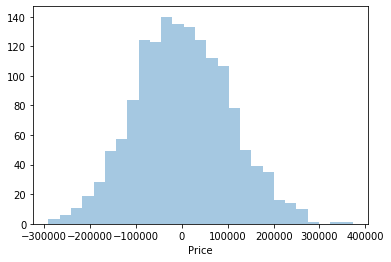

In [50]:
sns.distplot(y_test-ypred,kde=False)

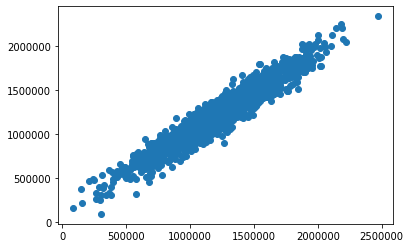

In [53]:
plt.scatter(y_test,ypred)

In [54]:
np.mean(abs(y_test-ypred))########mean value of price which deviated from actual value

82232.23632139822

In [55]:
df['Price'].mean() ##########on 1232072 there is an + or - err of 82232

1232072.65414236